In [74]:
import os
import sys
import logging
import csv
import numpy as np
import matplotlib
# matplotlib.use("TkAgg")            ####### added for MAC
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
matplotlib.rcParams.update({'font.size': 14})
from src.point import Point
%matplotlib inline

#=====================================================
#               functions
#=====================================================

def readPointCart(IN, name):
    ###############################
    # reading a single point from the input file
    # input:   IN   (input file)
    #          name (name of the point)
    # output:  point

    x0, y0, z0 = IN[name].split(",")
    return Point(x=float(x0), y=float(y0), z=float(z0))

In [82]:
from src.IO import ReadUserInput

DIR         = os.getcwd()+'/'
INFile      = DIR+'param.in'
IN          = ReadUserInput(INFile)
typeNumDom  = 'Q3D' #IN['numDomain']
typeAVG     = IN['typeAVG']
propName    = IN['property']
speeds      = ['26krpm', '28krpm', '32krpm'] #['26krpm', '28krpm', '32krpm']
plotformat  = ['bs', 'ro', 'g^']

In [87]:
colorVertLines= 'grey'

Pt_sle     = readPointCart(IN, 'STATOR_LE')
Pt_thr     = readPointCart(IN, 'THROAT_A')
Pt_ste     = readPointCart(IN, 'STATOR_TE')
Pt_intL    = readPointCart(IN, 'INTERFACE_L')

radSLE  = Pt_sle.rad
radthr  = Pt_thr.rad+0.0005
radSTE  = Pt_ste.rad
radintL = Pt_intL.rad
radRLE  =  float(IN['radLERotor'])
radRTE  =  float(IN['radTERotor'])

lineSLE  = np.ones(2)*radSLE
lineSTE  = np.ones(2)*radSTE
linethr  = np.ones(2)*radthr
lineintL = np.ones(2)*radintL
lineRLE  = np.ones(2)*radRLE
lineRTE  = np.ones(2)*radRTE
entropy  = np.ones(2)

In [88]:
lineSLE

array([0.14968289, 0.14968289])

In [89]:
scale       = 1
savefig     = 1
Intgrate    = 0

In [90]:
print('Hello world')


Hello world


In [93]:
if typeAVG=='Vol':
    if propName=='s_t':
        entropy[0]= 0
        entropy[1]= 1200
    elif propName=='s_v' or propName=='s_g':
        if Intgrate == 1:
            entropy[0]= 0
            entropy[1]= 25000
        else:
            entropy[0]= 0
            entropy[1]= 1600000
elif typeAVG=='Mass':
    if propName=='s_t':
        entropy[0]= 0
        entropy[1]= 35
    elif propName=='s_v' or propName=='s_g':
        if Intgrate == 1:
            entropy[0]= 0
            entropy[1]= 700
        else:
            entropy[0]= 0
            entropy[1]= 1200000

value=1.0

In [94]:
entropy

array([      0., 1200000.])

('reading the data from: ', 'DATA/Q3D/entropyMass_26krpm.txt')
('reading the data from: ', 'DATA/Q3D/entropyMass_28krpm.txt')
('reading the data from: ', 'DATA/Q3D/entropyMass_32krpm.txt')


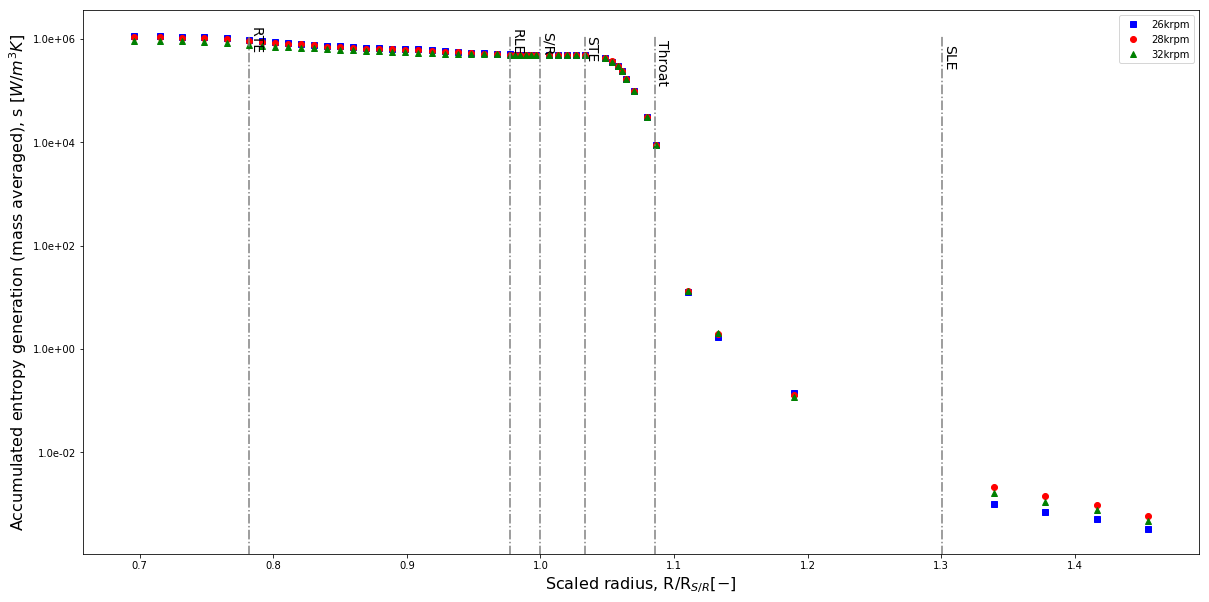

In [101]:
value=1.0
lineSLE  = np.ones(2)*radSLE
lineSTE  = np.ones(2)*radSTE
linethr  = np.ones(2)*radthr
lineintL = np.ones(2)*radintL
lineRLE  = np.ones(2)*radRLE
lineRTE  = np.ones(2)*radRTE

fig, ax= plt.subplots(figsize=(20,10))

for i in range(len(speeds)):

    file = "DATA/{0}/entropy{1}_{2}.txt".format(typeNumDom, typeAVG, speeds[i])

    print('reading the data from: ', file)

    step=[]
    radius=[]
    s_v=[]
    s_t=[]
    s_gen=[]
    dVA=[]
    property=[]


    list_curve=[]
    tmp = []

    f=open(file,"r")
    lines=f.readlines()

    for x in lines:
        step.append(float(x.split(' ')[0]))
        radius.append(float(x.split(' ')[1]))
        s_v.append(float(x.split(' ')[2]))
        s_t.append(float(x.split(' ')[3]))
        s_gen.append(float(x.split(' ')[4]))
        dVA.append(float(x.split(' ')[5]))
        tmp.append(x)
    f.close()



    if propName=='s_t':
        property =  s_t
    elif propName=='s_v':
        property =  s_v
    elif propName=='s_g':
        property =  s_v

    if Intgrate == 1:
        for j in range(len(property)-1):
            property[j+1] = (property[j+1]*dVA[j+1] + property[j]*dVA[j]) /(dVA[j+1] + dVA[j])
            dVA[j+1] = dVA[j+1] + dVA[j]
    else:
        for j in range(len(property)-1):
            property[j+1] = property[j+1] + property[j]

    if scale == 1:
        radius= radius/radintL


    ax.plot(radius, property,  plotformat[i], linewidth=2, markersize=6)


if scale == 1:
    lineSLE  *= 1/radintL
    linethr  *= 1/radintL
    lineSTE  *= 1/radintL
    lineintL *= 1/radintL
    lineRLE  *= 1/radintL
    lineRTE  *= 1/radintL

# plotting constant radius line
textLocationY = 0.75
dlocationY = 0.03
dlocationX = -0.0
ax.plot(lineSLE, entropy,  '-.', color=colorVertLines, linewidth=1.5)
# # plt.text(lineSLE[0]+dlocationX, entropy[0]+((entropy[1]-entropy[0])*textLocationY), "SLE")
ax.text(lineSLE[0]+dlocationX, entropy[0]+((entropy[1]-entropy[0])*0.4), "SLE", rotation=-90, fontsize=14)
ax.plot(linethr, entropy,  '-.', color=colorVertLines, linewidth=1.5)
ax.text(linethr[0]+dlocationX, entropy[0]+((entropy[1]-entropy[0])*0.5), "Throat", rotation=-90, fontsize=14)
ax.plot(lineSTE, entropy,  '-.', color=colorVertLines, linewidth=1.5)
ax.text(lineSTE[0]+dlocationX, entropy[0]+((entropy[1]-entropy[0])*0.6), "STE", rotation=-90, fontsize=14)
ax.plot(lineintL, entropy, '-.', color=colorVertLines, linewidth=1.5)
ax.text(lineintL[0]+dlocationX, entropy[0]+((entropy[1]-entropy[0])*0.7), "S/R", rotation=-90, fontsize=14)
ax.plot(lineRLE, entropy,  '-.', color=colorVertLines, linewidth=1.5)
ax.text(lineRLE[0]+dlocationX, entropy[0]+((entropy[1]-entropy[0])*0.8), "RLE", rotation=-90, fontsize=14)
ax.plot(lineRTE, entropy,  '-.', color=colorVertLines, linewidth=1.5)
ax.text(lineRTE[0]+dlocationX, entropy[0]+((entropy[1]-entropy[0])*0.9), "RTE", rotation=-90, fontsize=14)

# formatting
# ax.set_xlim(min(radius),radSLE/radintL+0.05)
# ax.set_ylim(entropy[0],entropy[1])


ax.set_xlabel('Scaled radius, R/R$_{S/R} [-]$', fontsize=16)
if typeAVG=='Vol':
    ax.set_ylabel('Accumulated entropy generation (volume averaged), s $[W/m^3 K]$', fontsize=16)
if typeAVG=='Mass':
    ax.set_ylabel('Accumulated entropy generation (mass averaged), s $[W/m^3 K]$', fontsize=16)

ax.set_yscale('log')
ax.legend((speeds[0], speeds[1], speeds[2]))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))


In [97]:
# if scale == 1:
#     lineSLE  *= 1/radintL
#     linethr  *= 1/radintL
#     lineSTE  *= 1/radintL
#     lineintL *= 1/radintL
#     lineRLE  *= 1/radintL
#     lineRTE  *= 1/radintL

# # plotting constant radius line
# textLocationY = 0.75
# dlocationY = 0.03
# dlocationX = -0.0
# ax.plot(lineSLE, entropy,  '-.', color=colorVertLines, linewidth=1.5)
# # plt.text(lineSLE[0]+dlocationX, entropy[0]+((entropy[1]-entropy[0])*textLocationY), "SLE")
# ax.text(lineSLE[0]+dlocationX, entropy[0]+((entropy[1]-entropy[0])*0.4), "SLE", rotation=-90, fontsize=14)
# ax.plot(linethr, entropy,  '-.', color=colorVertLines, linewidth=1.5)
# ax.text(linethr[0]+dlocationX, entropy[0]+((entropy[1]-entropy[0])*0.5), "Throat", rotation=-90, fontsize=14)
# ax.plot(lineSTE, entropy,  '-.', color=colorVertLines, linewidth=1.5)
# ax.text(lineSTE[0]+dlocationX, entropy[0]+((entropy[1]-entropy[0])*0.6), "STE", rotation=-90, fontsize=14)
# ax.plot(lineintL, entropy, '-.', color=colorVertLines, linewidth=1.5)
# ax.text(lineintL[0]+dlocationX, entropy[0]+((entropy[1]-entropy[0])*0.7), "S/R", rotation=-90, fontsize=14)
# ax.plot(lineRLE, entropy,  '-.', color=colorVertLines, linewidth=1.5)
# ax.text(lineRLE[0]+dlocationX, entropy[0]+((entropy[1]-entropy[0])*0.8), "RLE", rotation=-90, fontsize=14)
# ax.plot(lineRTE, entropy,  '-.', color=colorVertLines, linewidth=1.5)
# ax.text(lineRTE[0]+dlocationX, entropy[0]+((entropy[1]-entropy[0])*0.9), "RTE", rotation=-90, fontsize=14)

# # formatting
# ax.set_xlim(min(radius),radSLE/radintL+0.05)
# ax.set_ylim(entropy[0],entropy[1])


# ax.set_xlabel('Scaled radius, R/R$_{S/R} [-]$', fontsize=16)
# if typeAVG=='Vol':
#     ax.set_ylabel('Accumulated entropy generation (volume averaged), s $[W/m^3 K]$', fontsize=16)
# if typeAVG=='Mass':
#     ax.set_ylabel('Accumulated entropy generation (mass averaged), s $[W/m^3 K]$', fontsize=16)

# # ax.set_yscale('log')
# # ax.legend((speeds[0], speeds[1], speeds[2]))
# # ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
